**Scientific Programming with Python - Exercise 3**

adi peled 204818678, noy shabo 205983240

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Fix Data

### 1. Fix data object to category

In [4]:
def changeTypeColFromObjecctToCategory(df,colName,categoriesValues,isOrdered):
  """the function get dataframe,col name , categories Values and if the values are having order and return copy series in category type"""
  return pd.Categorical(df[colName], ordered=isOrdered, categories=categoriesValues)


In [6]:
mobiles = pd.read_csv('./mobile_price_1.csv', index_col='id')

mobiles['bluetooth'] = changeTypeColFromObjecctToCategory(mobiles,"bluetooth",['No', 'Yes'],False);
mobiles['cores'] = changeTypeColFromObjecctToCategory(mobiles,"cores",['single', 'dual', 'triple', 'quad', 'penta', 'hexa', 'hepta', 'octa'],True);
mobiles['speed'] = changeTypeColFromObjecctToCategory(mobiles,"speed",['low', 'medium', 'high'],True);
mobiles['sim'] = changeTypeColFromObjecctToCategory(mobiles,"sim",['Single', 'Dual'],True);
mobiles['screen'] = changeTypeColFromObjecctToCategory(mobiles,"screen",['Touch', 'LCD'],False);
mobiles['wifi'] = changeTypeColFromObjecctToCategory(mobiles,"wifi",['none', 'b', 'a', 'g', 'n'],True);
mobiles['gen'] = changeTypeColFromObjecctToCategory(mobiles,"gen",[2, 3, 4],True);

mobiles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   battery_power  2000 non-null   int64   
 1   m_dep          2000 non-null   float64 
 2   mobile_wt      2000 non-null   int64   
 3   px_height      2000 non-null   int64   
 4   px_width       2000 non-null   int64   
 5   ram            2000 non-null   int64   
 6   sc_h           2000 non-null   int64   
 7   sc_w           2000 non-null   int64   
 8   talk_time      2000 non-null   int64   
 9   bluetooth      2000 non-null   category
 10  gen            2000 non-null   category
 11  cores          2000 non-null   category
 12  speed          2000 non-null   category
 13  sim            2000 non-null   category
 14  f_camera       1526 non-null   float64 
 15  camera         1899 non-null   float64 
 16  memory         2000 non-null   int64   
 17  screen         2000 non-null   ca

# Task 1


### 1. Plot a correlation heatmap of the data set and include it.

Text(0.5, 1.0, 'correlation matrix')

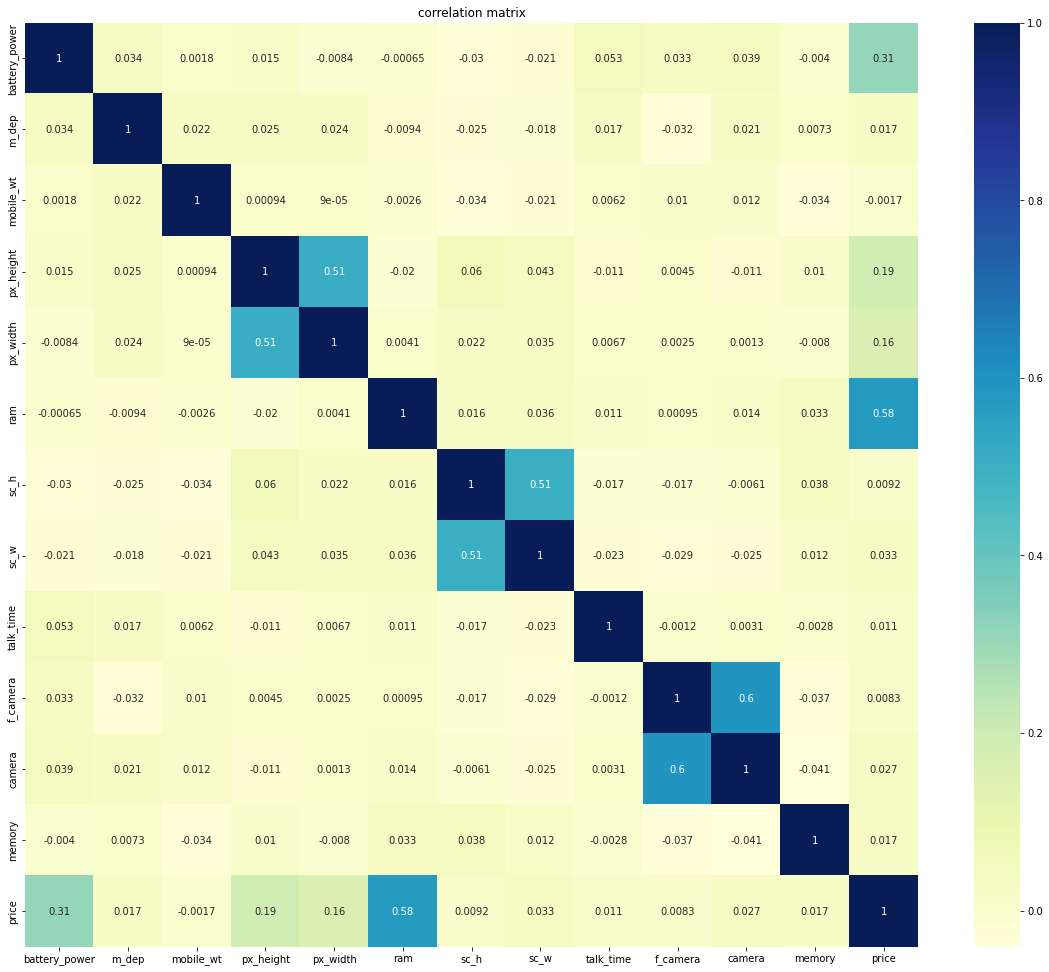

In [7]:
fig, ax = plt.subplots(figsize=(20,17))
corrMatrix=mobiles.corr()
sns.heatmap(corrMatrix,annot=True, ax=ax,cmap="YlGnBu")
ax.set_title('correlation matrix')

### 2. Which features would you say are correlated with the device price?

ram - low positive, linear correlation, in correlation Matrix 0.58

we can see that battery and price have corralation 0.31 - it's very low corralation but better than the others.

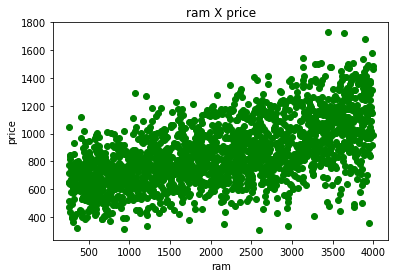

In [8]:
plt.scatter(mobiles['ram'], mobiles['price'],c=['green'])
plt.title("ram X price")
plt.xlabel("ram")
plt.ylabel("price")
plt.show()

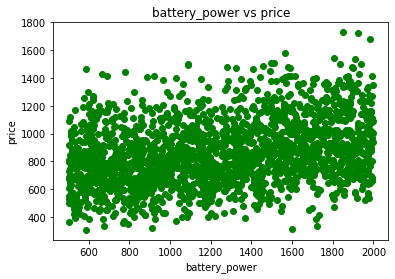

In [9]:
plt.scatter(mobiles['battery_power'], mobiles['price'],c=['green'])
plt.title("battery_power vs price")
plt.xlabel("battery_power")
plt.ylabel("price")
plt.show()

### 3. Are there features not shown in the correlation matrix that are correlated with the price? If so, what are they?

Category features are not shown in the correaltion matrix so we use boxplot.

The features that have correlation with the price are: 

gen - high correlation - The larger the generation the more expensive the price

wifi - low correlation - g and n have the same price,
                         b cheaper than a,
                         a cheaper than g and n

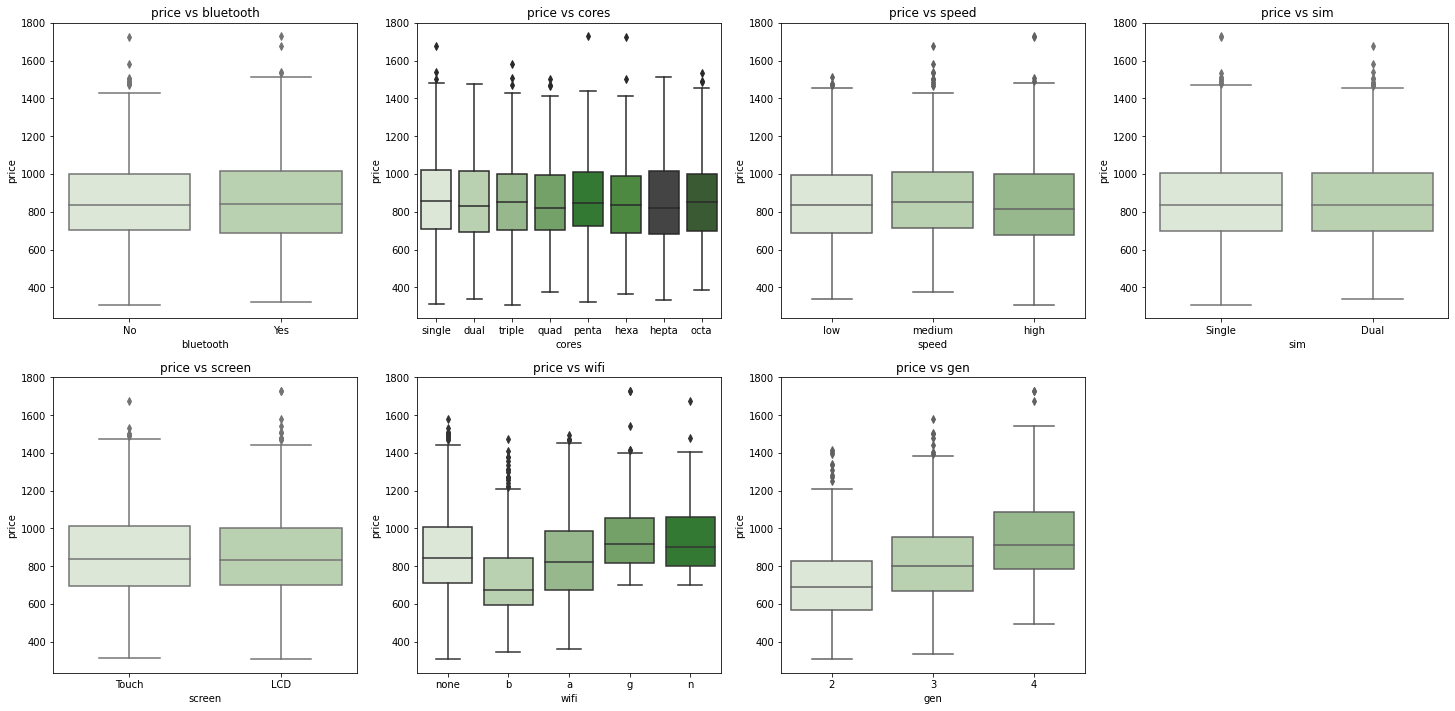

In [10]:
def createBoxPlots_featureVSprice(df,features):
  "create box plot for list of features with feature price"
  plt.figure(figsize=[25, 25])
  counter=1
  for feature in features:
     plt.subplot(4, 4, counter)
     sns.boxplot(y='price', x=feature, data=mobiles,palette = ['#dbead5','#b7d5ac','#93bf85','#6eaa5e','#288328', '#469536','#444444','#36602c'])
     plt.title('price vs '+ feature)
     counter+=1

features= ['bluetooth', 'cores', 'speed', 'sim', 'screen', 'wifi', 'gen']
createBoxPlots_featureVSprice(mobiles,features);

### 4. For each feature correlated with the price, plot its relationship with price.

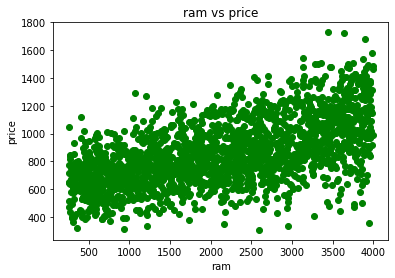

In [11]:
plt.scatter(mobiles['ram'], mobiles['price'],c=['green'])
plt.title("ram vs price")
plt.xlabel("ram")
plt.ylabel("price")
plt.show()

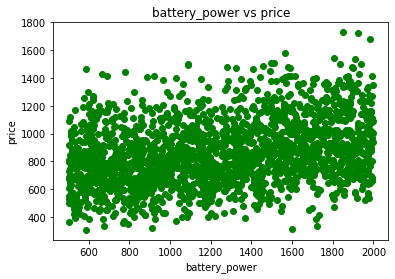

In [12]:
plt.scatter(mobiles['battery_power'], mobiles['price'],c=['green'])
plt.title("battery_power vs price")
plt.xlabel("battery_power")
plt.ylabel("price")
plt.show()

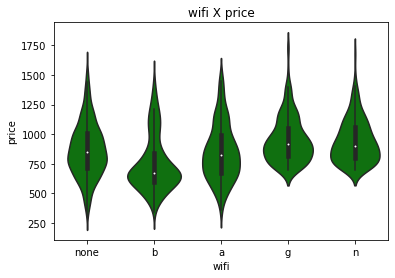

In [13]:
ax = sns.violinplot(x="wifi", y="price", data=mobiles, color='green', alpha=[0.8, 0.6, 0.4, 0.2]).set_title("wifi X price")


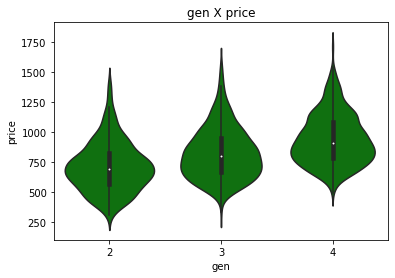

In [14]:
ax = sns.violinplot(x="gen", y="price", data=mobiles, color='green', alpha=[0.8, 0.6, 0.4, 0.2]).set_title("gen X price")

# Task 2

### 1. For each ordinal feature <O>, add a column to the dataframe which holds the ordered values representing each original value of F. This new column will be named <O>_ord. (without the triangle brackets)

In [15]:
coresOrdinal = {'single': 1, 'dual': 2, 'triple': 3, 'quad': 4, 'penta': 5, 'hexa': 6, 'hepta': 7, 'octa': 8}
mobiles['cores_ord'] = mobiles['cores'].replace(coresOrdinal)

speedOrdinal =  {'low':1, 'medium':2, 'high':3}
mobiles['speed_ord'] = mobiles['speed'].replace(speedOrdinal)

simOrdinal =  {'Single':1, 'Dual':2}
mobiles['sim_ord'] = mobiles['sim'].replace(simOrdinal)

wifiOrdinal =  {'none':0, 'b':1, 'a':2, 'g':3, 'n':4}
mobiles['wifi_ord'] = mobiles['wifi'].replace(wifiOrdinal)

mobiles['gen_ord'] = mobiles['gen'].astype('int64')



### 2. For each nominal feature <N>, add a binary column OR one-hot encoding (whichever is relevant for that feature) to the dataframe representing the original values. Name binary columns <N>_bin, and prefix one-hot encodings with <N>. (without the triangle brackets)

In [16]:
bluetoothToBin =  {'No':0, 'Yes':1}
mobiles['bluetooth_bin'] = mobiles['bluetooth'].replace(bluetoothToBin)


screenToBin =  {'LCD':0, 'Touch':1}
mobiles['screen_bin'] = mobiles['screen'].replace(screenToBin)



### 3. Plot a correlation heatmap of the modified data set and include it.

Text(0.5, 1.0, 'correlation matrix')

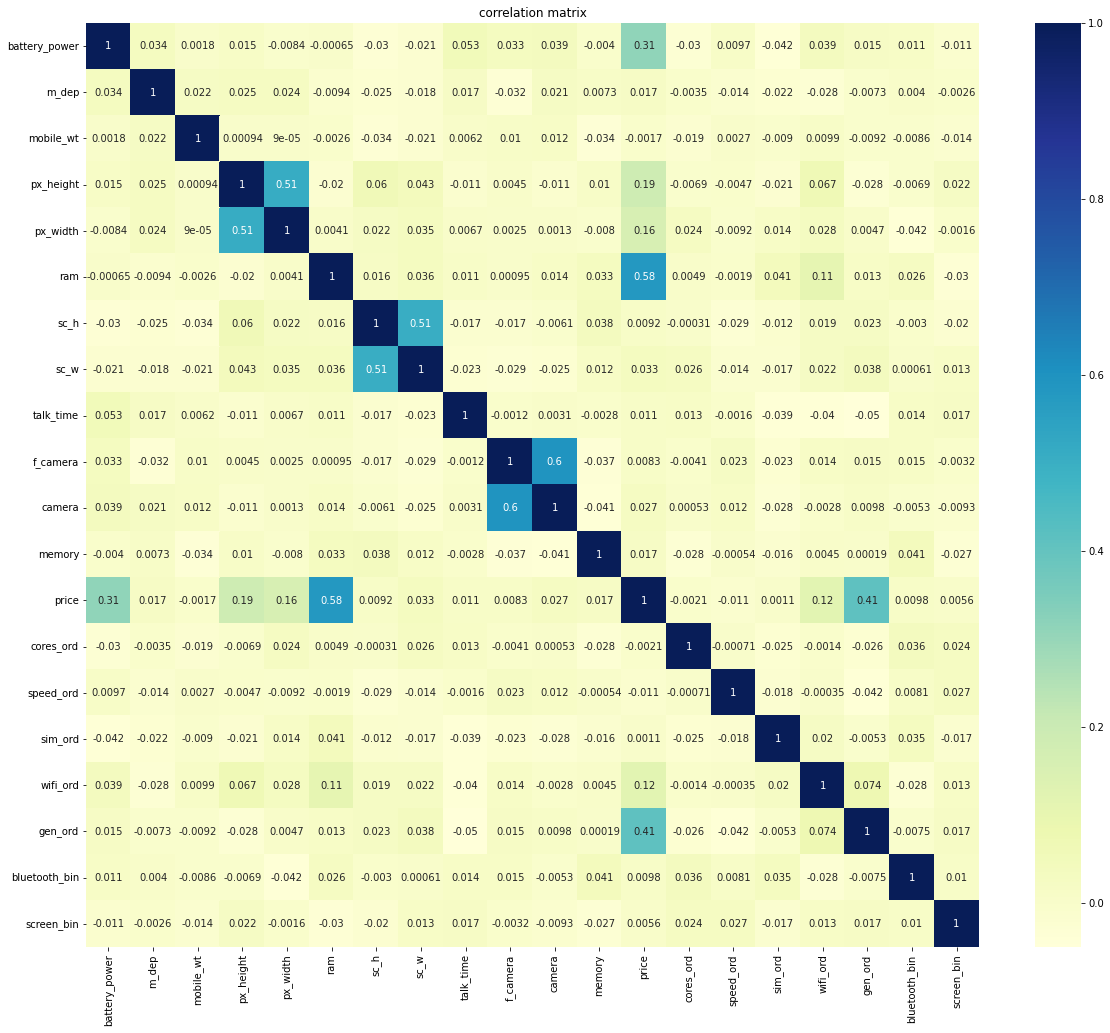

In [17]:
fig, ax = plt.subplots(figsize=(20,17))
corrMatrix=mobiles.corr()
sns.heatmap(corrMatrix,annot=True, ax=ax,cmap="YlGnBu")
ax.set_title('correlation matrix')

### 4. Save the entire dataframe to a csv file named “mobile_prices_converted.csv” and include it in the submission. Make sure you don’t add a redundant index column.

In [18]:
new_csv = 'mobile_prices_converted.csv'
mobiles.to_csv(new_csv)

# Task 3

### 1. Choose 4 features and use a 2-d plot to show the relationships between each pair. This should be done in the form of a 4x4 plot matrix as shown in class.

Text(0.5, 0.98, '4 features - 2D plot')

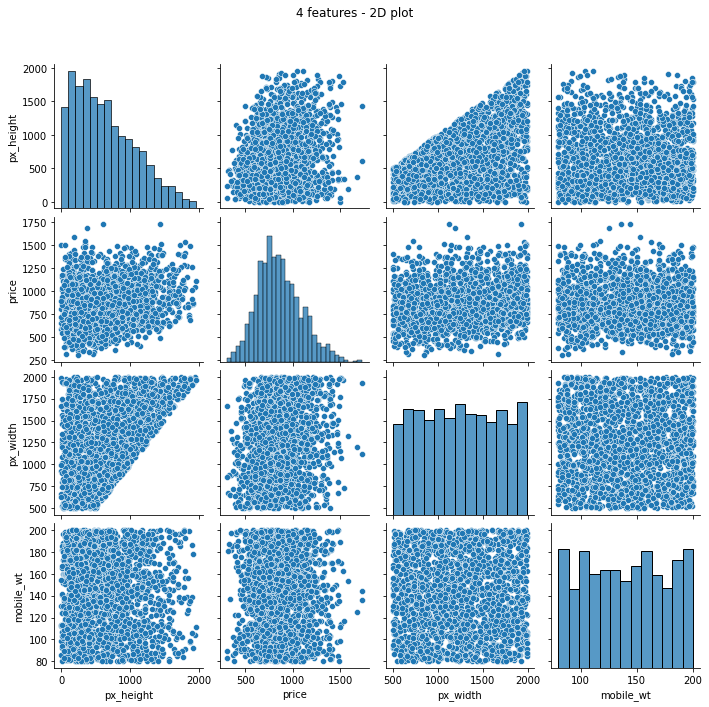

In [19]:
pairPlot =sns.pairplot(mobiles, vars=['px_height',"price","px_width",'mobile_wt'],height=2.5, palette='BuPu')
pairPlot.fig.subplots_adjust(top=0.9)
pairPlot.fig.suptitle('4 features - 2D plot')


### 2. We have shown in class how to plot 4 dimensions of data in a 2-dimensional plot. Use this method to plot the relationship between px_width, px_height, price and core. Px_width and px_height should be the X and Y coordinates respectively.

Text(0.5, 0.98, '4D in 2D')

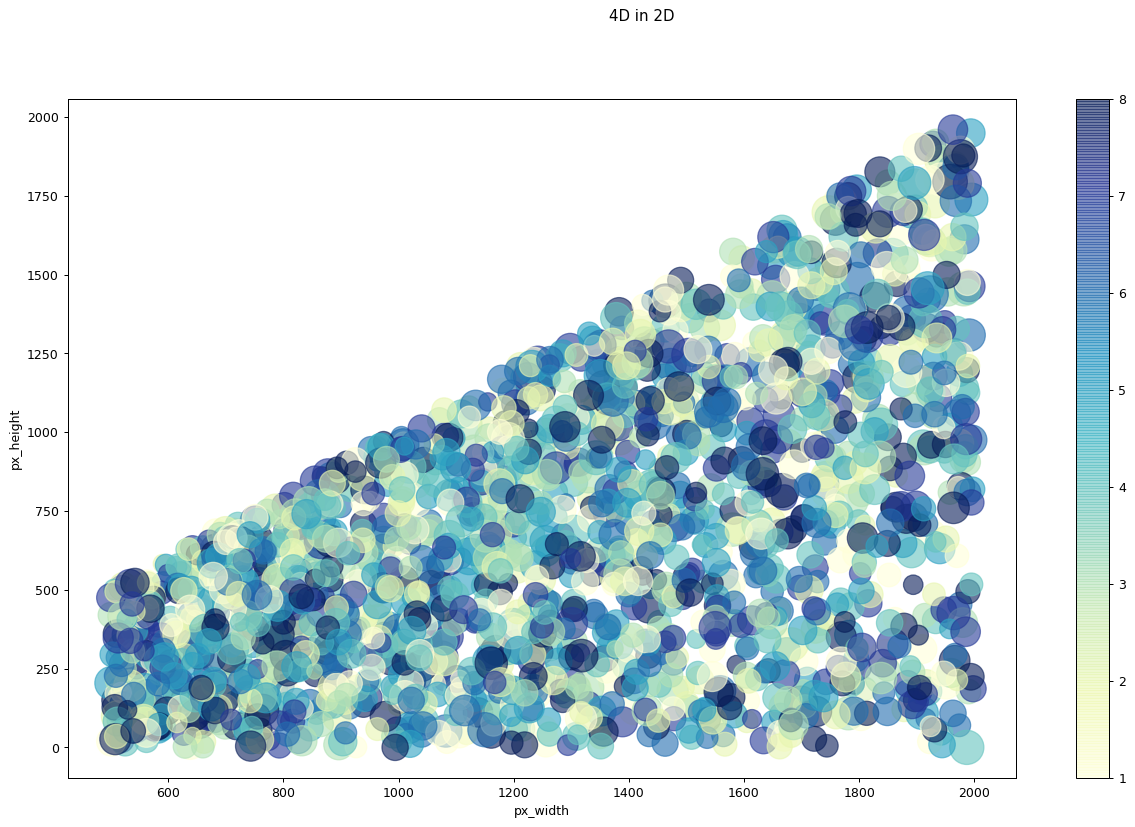

In [20]:
plt.figure(figsize=(17, 10), dpi=90)
# we divided price by 2 for make the circles size smallers
plt.scatter(mobiles['px_width'],mobiles['px_height'],s=mobiles['price']/2,c=mobiles['cores_ord'], cmap="YlGnBu", alpha=0.6)
plt.colorbar()

plt.xlabel('px_width')
plt.ylabel('px_height')
plt.suptitle('4D in 2D')


### 3. There is an additional file named “mobile_prices_2.csv” distributed alongside the exercise. This file contains a mapping of id to price. This price is a transformation of the price in the original data set. The transformation has been made based on a single feature from the data set. Which feature was used and how do you know? Include any relevant plots and tables.

a. Add price2 colum to mobiles df

In [21]:
mobiles2 = pd.read_csv('./mobile_price_2.csv', index_col='id')

mobiles['price_2'] = mobiles2['price_2']


b. check the ratio between price2 to price for every id

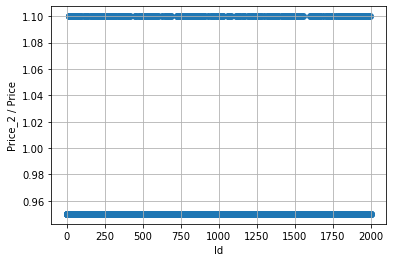

In [23]:
mobiles['Price_2 / Price'] = mobiles['price_2'] / mobiles['price']

plt.scatter(mobiles.index, mobiles['Price_2 / Price'])
plt.xlabel('Id')
plt.ylabel('Price_2 / Price')
plt.grid()
plt.show()

c. there are two groups of ratio.

or the price was decrease with 5%, or increase with 10%

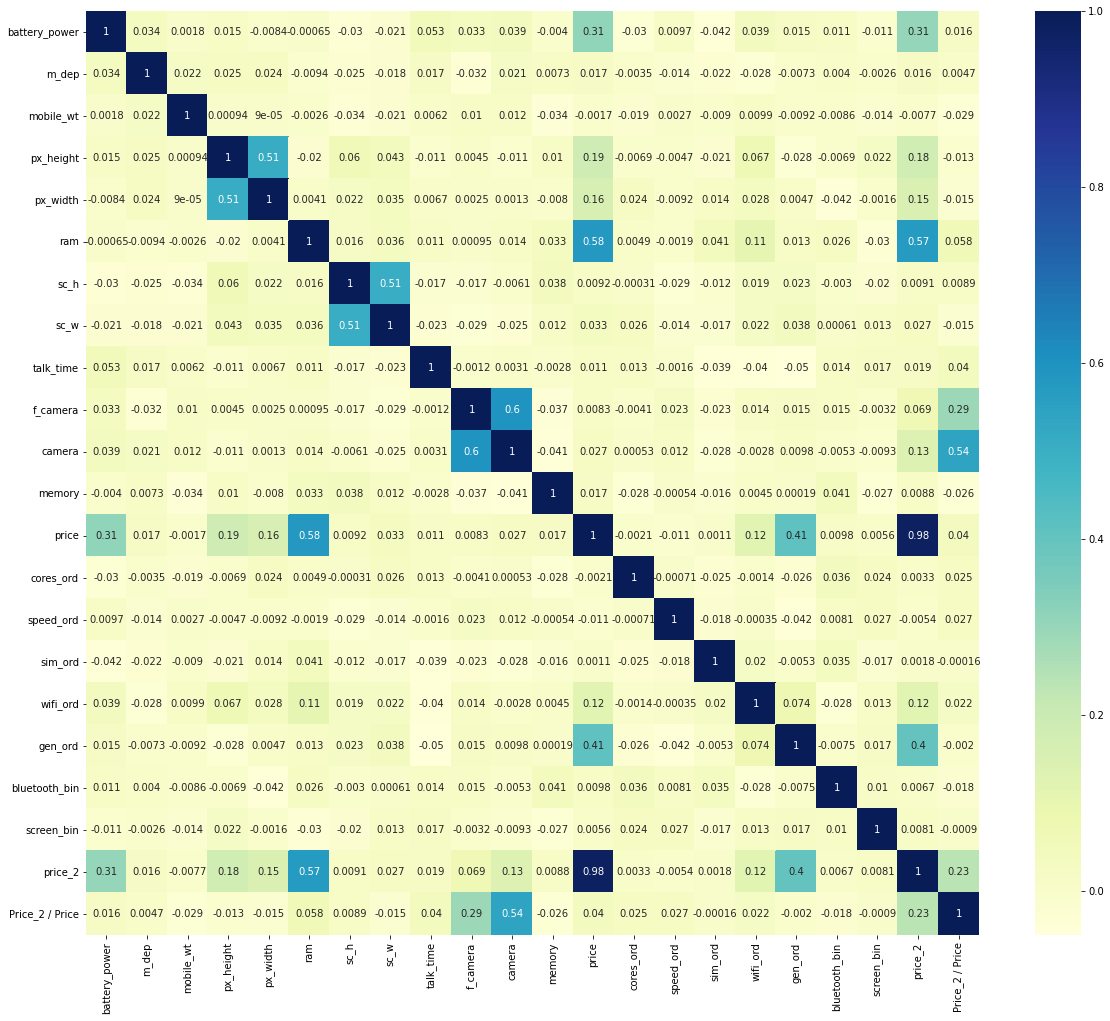

In [24]:
fig, ax = plt.subplots(figsize=(20,17))
corrMatrix=mobiles.corr()
sns.heatmap(corrMatrix,annot=True, ax=ax,cmap="YlGnBu")

The highest correlation of 'price_2 / price' is with camera


d. we try to do scatterplot with colors that represent the camera values.

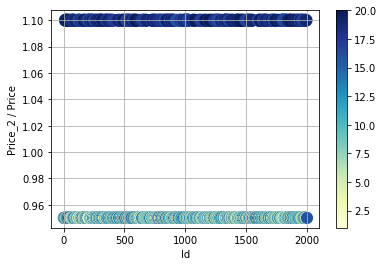

In [26]:
plt.scatter(mobiles.index, mobiles['Price_2 / Price'], c=mobiles['camera'], alpha=1, s=mobiles['Price_2 / Price']*130, cmap="YlGnBu")
plt.xlabel('Id')
plt.ylabel('Price_2 / Price')
plt.colorbar()
plt.grid()
plt.show()


It can be seen that there is a clear division of colors.

When the camera quality is higher then 15 in the most of the cases, the price goes up by 10%, otherwise it goes down by 5%.

Another vision:

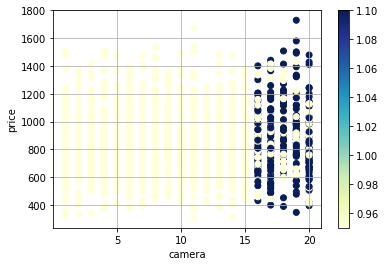

In [27]:
plt.scatter(mobiles['camera'], mobiles['price'] , c=mobiles['Price_2 / Price'], alpha=1, cmap="YlGnBu")
plt.xlabel('camera')
plt.ylabel('price')
plt.colorbar()
plt.grid()
plt.show()


# Task 4 – Bonus Task!

1. In Task 3 question 3 you were asked to find the feature on which the transformation of price into price_2 was made. You must now find that exact manner in which this transformation was done. Analyze the data and present the algorithm used when transforming price into price_2.